In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the dataset

data = pd.read_csv('iris-data.csv')
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# taking a look at the shape of the dataset

data.shape

(150, 5)

In [4]:
# looking at the variables and their types
data.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

Data falls within the expected range

In [5]:
# checking for duplicates

before = len(data)
data = data.drop_duplicates()
after = len(data)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  2


In [6]:
#Examine the descriptive statistics of the numeric variables

stats = data.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
sepal_length_cm,148.0,5.648608,1.320186,0.055,5.1,5.70,6.4,7.9,1.3
sepal_width_cm,148.0,3.056757,0.435056,2.000,2.8,3.00,3.3,4.4,0.5
petal_length_cm,148.0,3.764865,1.763109,1.000,1.6,4.35,5.1,6.9,3.5
petal_width_cm,143.0,1.239860,0.752287,0.100,0.4,1.30,1.8,2.5,1.4


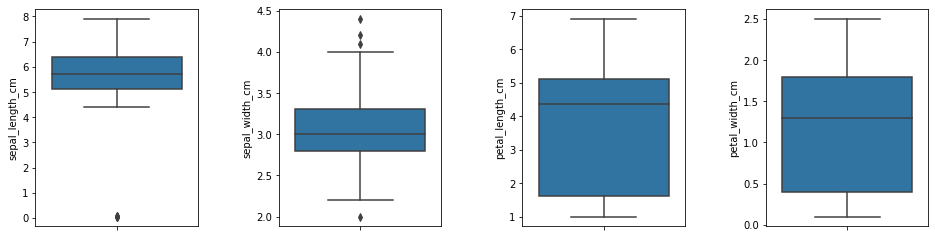

In [7]:
# checking for outliers by plotting the boxplot for each variable

fig, ax = plt.subplots(1,4, figsize=(16, 4))
sns.boxplot(y=data.sepal_length_cm, ax=ax[0])
sns.boxplot(y=data.sepal_width_cm, ax=ax[1])
sns.boxplot(y=data.petal_length_cm, ax=ax[2])
sns.boxplot(y=data.petal_width_cm, ax=ax[3])
plt.subplots_adjust(wspace=0.5)

In [9]:
# checking for outliers

outliers = pd.DataFrame(columns=data.columns).sort_index()

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data[(data[col] < lower) | 
                   (data[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results).sort_index()

In [10]:
outliers

,Outlier,class,petal_length_cm,petal_width_cm,sepal_length_cm,sepal_width_cm
15,sepal_width_cm,Iris-setosa,1.5,0.4,5.700,4.4
32,sepal_width_cm,Iris-setosa,1.5,0.1,5.200,4.1
33,sepal_width_cm,Iris-setosa,1.4,0.2,5.500,4.2
60,sepal_width_cm,Iris-versicolor,3.5,1.0,5.000,2.0
77,sepal_length_cm,Iris-versicolor,5.0,1.7,0.067,3.0
78,sepal_length_cm,Iris-versicolor,4.5,1.5,0.060,2.9
79,sepal_length_cm,Iris-versicolor,3.5,1.0,0.057,2.6
80,sepal_length_cm,Iris-versicolor,3.8,1.1,0.055,2.4
81,sepal_length_cm,Iris-versicolor,3.7,1.0,0.055,2.4


In [11]:
# I'm going to drop the rows where sepal lenght is lower than one

data.drop(data[data['sepal_length_cm'] < 1 ].index , inplace=True)

In [12]:
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,143.000000,143.000000,143.000000,138.000000
mean,5.844056,3.070629,3.753147,1.239130
std,0.815831,0.433595,1.789634,0.763916
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.550000,0.325000
50%,5.800000,3.000000,4.400000,1.350000
75%,6.400000,3.350000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data is encoded properly

In [13]:
# exploring the column class

data['class'].value_counts()

Iris-virginica     49
Iris-setosa        48
Iris-versicolor    40
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [14]:
# transform the string-type class column values to the numbers

class_unique = data['class'].unique()
class_list = class_unique.tolist()

for class_value in class_list:
    data[class_value] = 0
    
for value in class_list:
    data[value] = data['class'].str.contains(pat = value).astype(int)

In [15]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,Iris-setosa,Iris-setossa,Iris-versicolor,versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0,0,0


Missing data

In [16]:
# checking for missing values in columns

null_cols = data.isnull().sum()
null_cols[null_cols > 0]

petal_width_cm    5
dtype: int64

In [17]:
# checking for missing values in rows

missing_rows = data[(data.isnull().any(axis=1)==True)]
missing_rows.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,Iris-setosa,Iris-setossa,Iris-versicolor,versicolor,Iris-virginica
7,5.0,3.4,1.5,NaN,Iris-setosa,1,0,0,0,0
8,4.4,2.9,1.4,NaN,Iris-setosa,1,0,0,0,0
9,4.9,3.1,1.5,NaN,Iris-setosa,1,0,0,0,0
10,5.4,3.7,1.5,NaN,Iris-setosa,1,0,0,0,0
11,4.8,3.4,1.6,NaN,Iris-setosa,1,0,0,0,0


In [18]:
# percentage of missing values

total_rows = len(data['petal_width_cm'])
missing_data = (data['petal_width_cm'].isnull().sum())

ratio = missing_data / total_rows
print("Percentage of missing values:", round((ratio*100),2), "%")

Percentage of missing values: 3.5 %


In [19]:
# I'm going to estimate the missing data using a linear interpolation

data_fixed = data.interpolate()
data_fixed.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,Iris-setosa,Iris-setossa,Iris-versicolor,versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0,0,0


In [20]:
# checking if the code was executed correctly

null_cols = data_fixed.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

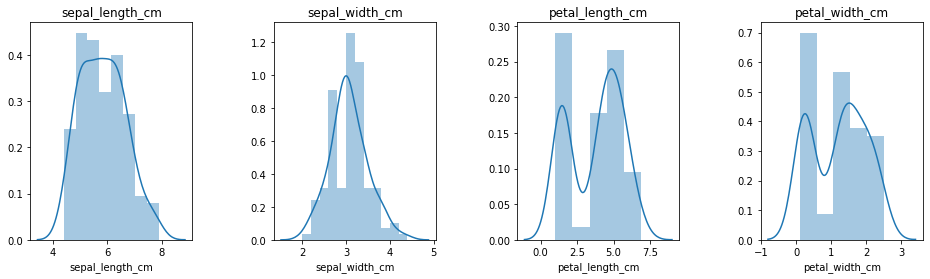

In [21]:
# plotting the distributions

fields = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
fig, axs = plt.subplots(1,len(fields),figsize=(16, 4))
plt.subplots_adjust(wspace=0.5)
for i, f in enumerate(fields):
    plt.sca(axs[i])
    plt.title(f)
    axs[i] = sns.distplot(data_fixed[f])